In [1]:
!pip3 install opencv-python

Looking in indexes: https://artifactory.blackstone.com/artifactory/api/pypi/python/simple


In [1]:
import cv2
import numpy as np
import matplotlib.image as img
from matplotlib import pyplot as plt

In [3]:
#reading the image
img = cv2.imread("images/Guy_Fieri.jpg")
type(img)

numpy.ndarray

In [4]:
#colour quantization
#k value determines the number of colours in the image
total_color = 8
k=total_color

In [5]:
# Transform the image
data = np.float32(img).reshape((-1, 3))

In [6]:
# Determine criteria
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 20, 0.001)

In [7]:
# Implementing K-Means
ret, label, center = cv2.kmeans(data, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)
center = np.uint8(center)
result = center[label.flatten()]
result = result.reshape(img.shape)

In [8]:
blurred = cv2.bilateralFilter(result, d=10, sigmaColor=250,sigmaSpace=250)

In [9]:
#saving the image
filename = 'blurred_Guy.jpg'
# Using cv2.imwrite() method
# Saving the image
cv2.imwrite(filename, blurred)

True

In [18]:
#Create Edge Mask
def edge_mask(img, line_size, blur_value):
  gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  gray_blur = cv2.medianBlur(gray, blur_value)
  edges = cv2.adaptiveThreshold(gray_blur, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, line_size, blur_value)
  return edges

In [21]:
line_size = 7
blur_value = 7

In [22]:
edges = edge_mask(img, line_size, blur_value)

In [14]:
cartoon = cv2.bitwise_and(blurred, blurred, mask=edges)

In [15]:
filename = 'cartoon_Guy.jpg'
# Using cv2.imwrite() method
# Saving the image
cv2.imwrite(filename, cartoon)

True

In [30]:
text_image = cv2.imread('cartoon_Guy.jpg',cv2.IMREAD_UNCHANGED)
text_image.shape

(1500, 1150, 3)

In [32]:
import textwrap

In [36]:
text_image = cv2.imread('cartoon_Guy.jpg',cv2.IMREAD_UNCHANGED)

position = (20,50)
text = 'Gotta have some zazzle on your hot dog! Add some ketchup, mustard, and relish for the perfect bite.Fieri|OpenAI'
wrapped_text = textwrap.wrap(text, width=40)

cv2.putText(
     text_image, #numpy array on which text is written
     str(wrapped_text), #text
     position, #position at which writing has to start
     cv2.FONT_HERSHEY_SIMPLEX, #font family
     3, #font size
     (209, 80, 0, 255), #font color
     3) #font stroke
cv2.imwrite('output_text.jpg', text_image)

True

In [62]:
new_img = cv2.imread('cartoon_Guy.jpg')
print(new_img.shape)

height, width, channel = new_img.shape

text_img = np.ones((height, width))
print(text_img.shape)
font = cv2.FONT_HERSHEY_SIMPLEX

text = "Gotta have some zazzle on your hot dog! Add some ketchup, mustard, and relish for the perfect bite. \n Fieri | OpenAI"
wrapped_text = textwrap.wrap(text, width=35)
x, y = 10, 40
font_size = 1.5
font_thickness = 2

for i, line in enumerate(wrapped_text):
    textsize = cv2.getTextSize(line, font, font_size, font_thickness)[0]

    gap = textsize[1] + 10

    y = int((img.shape[0] + textsize[1]) / 2) + i * gap
    x = int((img.shape[1] - textsize[0]) / 2)

    cv2.putText(new_img, line, (x, y), font,
                font_size, 
                (209, 80, 0, 255), 
                font_thickness, 
                lineType = cv2.LINE_AA)

cv2.imshow("Result Image", new_img)


(1500, 1150, 3)
(1500, 1150)


True

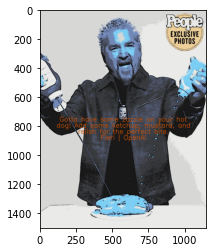

In [63]:
plt.imshow(new_img)
cv2.imwrite('output_text_2.jpg', new_img)